In [1]:
import glob
from ar6_ch6_rcmipfigs import constants
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in


Load data:

In [2]:
path_ssps = constants.INPUT_DATA_DIR /'SSPs'
paths = path_ssps.glob('*')
files = [x for x in paths if x.is_file()]
files




[PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp534-over_1750-2500.csv'),
 PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp119_1750-2500.csv'),
 PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp460_1750-2500.csv'),
 PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp585_1750-2500.csv'),
 PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp370_1750-2500.csv'),
 PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp370-lowNTCF-aerchemmip_1750-2500.csv'),
 PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp126_1750-2500.csv'),
 PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp245_1750-2500.csv'),
 PosixPa

In [3]:
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR, INPUT_DATA_DIR

SAVEPATH_DATASET = OUTPUT_DATA_DIR / 'ERF_data.nc'
SAVEPATH_DATASET

PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_out/ERF_data.nc')

In [4]:
ERFs = {}
nms = []
for file in files:
    fn = file.name # filename
    nm = fn.split('_')[1]
    print(nm)
    print(file)
    ERFs[nm] = pd.read_csv(file).copy()
    nms.append(nm)

ssp534-over
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp534-over_1750-2500.csv
ssp119
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp119_1750-2500.csv
ssp460
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp460_1750-2500.csv
ssp585
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp585_1750-2500.csv
ssp370
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp370_1750-2500.csv
ssp370-lowNTCF-aerchemmip
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp370-lowNTCF-aerchemmip_1750-2500.csv
ssp126
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp126_1750-2500.csv
ssp245
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in/SSPs/ERF_ssp245_1750-2500.csv
ssp434
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCM

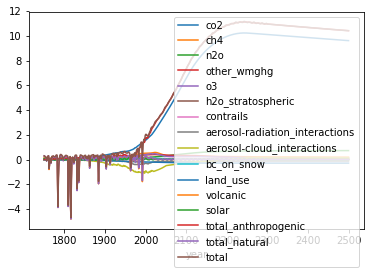

In [5]:
ERFs[nm].set_index('year').plot()

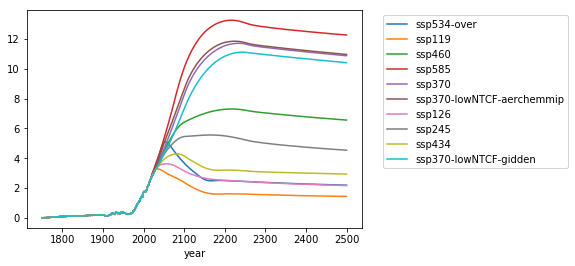

In [6]:
for scn in ERFs.keys(): 
    ERFs[scn].set_index('year')['total_anthropogenic'].plot(label=scn)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left',)

In [7]:
ERFs['ssp534-over'].columns#[scn]#.columns

Index(['year', 'co2', 'ch4', 'n2o', 'other_wmghg', 'o3', 'h2o_stratospheric',
       'contrails', 'aerosol-radiation_interactions',
       'aerosol-cloud_interactions', 'bc_on_snow', 'land_use', 'volcanic',
       'solar', 'total_anthropogenic', 'total_natural', 'total'],
      dtype='object')

## Add together aerosol forcing:

In [8]:
aero_tot = 'aerosol-total'
aero_cld = 'aerosol-cloud_interactions'
aero_rad = 'aerosol-radiation_interactions'
for scn in ERFs.keys():
    ERFs[scn][aero_tot] = ERFs[scn][aero_cld]+ERFs[scn][aero_rad]

In [9]:
ERFs['ssp534-over'].columns#[scn]#.columns

Index(['year', 'co2', 'ch4', 'n2o', 'other_wmghg', 'o3', 'h2o_stratospheric',
       'contrails', 'aerosol-radiation_interactions',
       'aerosol-cloud_interactions', 'bc_on_snow', 'land_use', 'volcanic',
       'solar', 'total_anthropogenic', 'total_natural', 'total',
       'aerosol-total'],
      dtype='object')

In [10]:
ERFs.keys()

dict_keys(['ssp534-over', 'ssp119', 'ssp460', 'ssp585', 'ssp370', 'ssp370-lowNTCF-aerchemmip', 'ssp126', 'ssp245', 'ssp434', 'ssp370-lowNTCF-gidden'])

In [11]:
import xarray as xr
das = []
for nm in nms:
    ds = ERFs[nm].set_index('year').to_xarray()#.squeeze()
    da = ds.to_array('variable')
    da = da.rename(nm)
    das.append(da)

In [12]:
da_tot = xr.merge(das).to_array('scenario')
da_tot = da_tot.rename('ERF')

da_tot.to_netcdf(SAVEPATH_DATASET)
da_tot.to_dataset()

<xarray.Dataset>
Dimensions:   (scenario: 10, variable: 17, year: 751)
Coordinates:
  * year      (year) int64 1750 1751 1752 1753 1754 ... 2496 2497 2498 2499 2500
  * variable  (variable) <U30 'co2' 'ch4' 'n2o' ... 'total' 'aerosol-total'
  * scenario  (scenario) <U25 'ssp534-over' 'ssp119' ... 'ssp370-lowNTCF-gidden'
Data variables:
    ERF       (scenario, variable, year) float64 0.0 0.001416 ... 0.001771

In [13]:
da_check = xr.open_dataset(SAVEPATH_DATASET)
da_check

<xarray.Dataset>
Dimensions:   (scenario: 10, variable: 17, year: 751)
Coordinates:
  * year      (year) int64 1750 1751 1752 1753 1754 ... 2496 2497 2498 2499 2500
  * variable  (variable) object 'co2' 'ch4' 'n2o' ... 'total' 'aerosol-total'
  * scenario  (scenario) object 'ssp534-over' ... 'ssp370-lowNTCF-gidden'
Data variables:
    ERF       (scenario, variable, year) float64 ...

In [14]:
import matplotlib.pyplot as plt

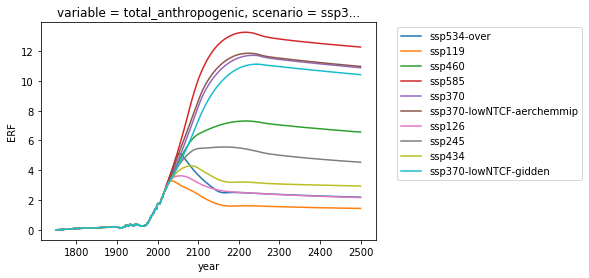

In [15]:
for scn in da_check.scenario: 
    da_check.sel(variable='total_anthropogenic')['ERF'].sel(scenario=scn).plot(label=scn.values)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left',)

In [16]:
SAVEPATH_DATASET

PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_out/ERF_data.nc')